Source : https://github.com/LintangWisesa/Ujian_AnalyticsVisualization_JCDS03

## **Soal 3 - Dosen & Mahasiswa**

1. Tuliskan langkah-langkah/urutan query MongoDB untuk membuat sebuah database Non-RDBMS (Document Store) dengan spesifikasi sebagai berikut:
- Terdapat sebuah database dengan nama "Kampus".
- Database "Kampus" memiliki 2 buah user:
    * User pertama adalah admin database bernama "andi", dengan password "anditopsecret".
    * User kedua bukanlah admin, namun tetap dapat memasukkan & membaca data dari database. User kedua bernama "budi", dengan password "buditopsecret".

- Database "Kampus" memiliki 2 buah collection: "Dosen" dan "Mahasiswa".
```
{nama:"Caca",
usia:28,
asal:"Jakarta",
bidang:"Fisika Astrologi",
titel:"S2",
status:"Honorer",
nip:123,
matkul:["Metrologi","Kosmologi","Kalkulus"]},
{nama:"Dedi",
usia:29,
asal:"Yogyakarta",
bidang:"Fisika Terapan",
titel:"S3",
status:"PNS",
nip:456,
matkul:["Instrumentasi","Elektronika","Fisika Dasar"]},
{nama:"Euis",
usia:30,
asal:"Bandung",
bidang:"Fisika Teoretik",
titel:"S1",
status:"Honorer",
nip:789,
matkul:["Fisika Dasar","Fisika Modern","Kalkulus"]}
```



- Masukkan 3 buah data berikut ke collection "Mahasiswa":
```
{nama:"Faza",
usia:19,
asal:"Aceh",
prodi:"Fisika",
angkatan:2017,
nim:123},
{nama:"Gilang",
usia:20,
asal:"Semarang",
prodi:"Fisika",
angkatan:2017,
nim:456},
{nama:"Hanafi",
usia:19,
asal:"Makassar",
prodi:"Fisika",
angkatan:2017,
nim:789}
```


### **Jawaban Syntax di MongoDB**

**1. Membuat User 'andi'**
```
db.createUser({
. user:"andi",
. pwd:"anditopsecret",
. roles: ['dbAdmin, 'readWrite']
```

**2. Membuat User 'budi'**
```
db.createUser({
.. user:"budi",
.. pwd:"buditopsecret",
.. roles:['readWrite']
.. })
```

**3. Menampilkan User yang telah dibuat**
```
>> show users
{
        "_id" : "Kampus.andi",
        "user" : "andi",
        "db" : "Kampus",
        "roles" : [
                {
                        "role" : "dbAdmin",
                        "db" : "Kampus"
                },
                {
                        "role" : "readWrite",
                        "db" : "Kampus"
                }
        ]
}
{
        "_id" : "Kampus.budi",
        "user" : "budi",
        "db" : "Kampus",
        "roles" : [
                {
                        "role" : "readWrite",
                        "db" : "Kampus"
                }
        ]
}
```

**4. Membuat Collection 'Dosen' dan 'Mahasiswa'**
```
db.createCollection('Dosen')
db.createCollection('Mahasiswa')
```

**5. Memasukkan Data ke dalam Collection 'Dosen'**
```
db.Dosen.insert([
. {nama:"Caca",
. usia:28,
. asal:"Jakarta",
. bidang:"Fisika Astrologi",
. titel:"S2",
. status:"Honorer",
. nip:123,
. matkul:["Metrologi","Kosmologi","Kalkulus"]},
. {nama:"Dedi",
. usia:29,
. asal:"Yogyakarta",
. bidang:"Fisika Terapan",
. titel:"S3",
. status:"PNS",
. nip:456,
. matkul:["Instrumentasi","Elektronika","Fisika Dasar"]},
. {nama:"Euis",
. usia:30,
. asal:"Bandung",
. bidang:"Fisika Teoretik",
. titel:"S1",
. status:"Honorer",
. nip:789,
. matkul:["Fisika Dasar","Fisika Modern","Kalkulus"]}
. ])
```

**6. Memasukkan Data ke dalam Collection 'Mahasiswa'**
```
db.Mahasiswa.insert([
. {nama:"Faza",
. usia:19,
. asal:"Aceh",
. prodi:"Fisika",
. angkatan:2017,
. nim:123},
. {nama:"Gilang",
. usia:20,
. asal:"Semarang",
. prodi:"Fisika",
. angkatan:2017,
. nim:456},
.
. {nama:"Hanafi",
. usia:19,
. asal:"Makassar",
. prodi:"Fisika",
. angkatan:2017,
. nim:789}
. ])
```


2. Dengan pyMongo, matplotlib & pandas, buatlah sebuah program python yang dapat mengakses dan menampilkan:
- Nama, asal, usia & status dari daftar dosen & mahasiswa di collection tersebut. Output yang diharapkan berupa 2 buah dataframe. 

### **Jawaban Coding di Jupyter Lab using pymongo**

In [1]:
import pymongo
import pandas as pd
dburl = 'mongodb://localhost:27017/'
mymongo = pymongo.MongoClient(dburl)

In [2]:
# MELIHAT DAFTAR DATABASE
dbs = mymongo.list_database_names()
print(dbs)

['Kampus', 'admin', 'config', 'hahaha', 'local', 'pymongodb', 'resto', 'tokoonline']


In [3]:
# MENGAKSES COLLECTION 'Dosen' DALAM DATABASE 'Kampus'
mydb = mymongo['Kampus']
Dosen = mydb['Dosen']
db_dosen = list(Dosen.find())
# db_dosen

list_key = list(db_dosen[0].keys())
col = [list_key[3],list_key[1],list_key[6],list_key[2]]

asal = [dic['asal'] for dic in db_dosen]
nama = [dic['nama'] for dic in db_dosen]
# status = [dic['status'] for dic in db_dosen]
status = ["Dosen", "Dosen", "Dosen"]
usia = [dic['usia'] for dic in db_dosen]

df_dosen = pd.DataFrame([asal, nama, status, usia])
df_dosen = df_dosen.transpose()
df_dosen.columns = col
df_dosen

,asal,nama,status,usia
0,Jakarta,Caca,Dosen,28
1,Yogyakarta,Dedi,Dosen,29
2,Bandung,Euis,Dosen,30


In [4]:
# MENGAKSES COLLECTION 'Mahasiswa' DALAM DATABASE 'Kampus'
mydb1 = mymongo['Kampus']
Mahasiswa = mydb1['Mahasiswa']
db_mhs = list(Mahasiswa.find())

list_key1 = list(db_mhs[0].keys())
col1 = [list_key1[3],list_key1[1],"status",list_key1[2]]

asal1 = [dic['asal'] for dic in db_mhs]
nama1 = [dic['nama'] for dic in db_mhs]
status1 = ["Mahasiswa", "Mahasiswa", "Mahasiswa"]
usia1 = [dic['usia'] for dic in db_mhs]

df_mhs = pd.DataFrame([asal1, nama1, status1, usia1])
df_mhs = df_mhs.transpose()
df_mhs.columns = col1
df_mhs

,asal,nama,status,usia
0,Aceh,Faza,Mahasiswa,19
1,Semarang,Gilang,Mahasiswa,20
2,Makassar,Hanafi,Mahasiswa,19


- Sekaligus menampilkan diagram batang usia dari dosen & mahasiswa. 

In [5]:
import matplotlib.pyplot as plt

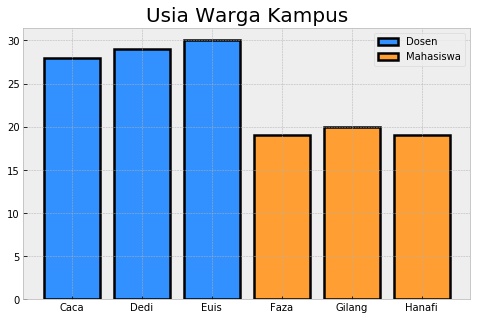

In [50]:
plt.style.use('bmh')
plt.figure('Kampus', figsize=(8,5))

plt.bar(df_dosen['nama'], df_dosen['usia'], 
        color=['#3390ff'],
        edgecolor='black', linewidth=2.5)

plt.bar(df_mhs['nama'], df_mhs['usia'], 
        color=['#ff9f33'],
        edgecolor='black', linewidth=2.5)


plt.title('Usia Warga Kampus', fontdict={'size':20})
plt.legend(['Dosen','Mahasiswa'])
plt.show()